In [22]:
import pickle as pkl
import jsonlines
import json
from matplotlib import pyplot as plt

In [58]:
def flatten_clusters(clusters):
    output = []
    for cluster in clusters:
        output.extend(cluster)
    return output

In [10]:
data = []
with open('data/experiment_inputs/ontonotes_chinese/train.chinese.512.jsonlines', 'r') as f:
    reader = jsonlines.Reader(f)
    for line in reader:
        data.append(line)

In [11]:
sample = data[0]
print(type(sample))

<class 'dict'>


In [15]:
with open('data/experiment_inputs/sample_chinese/train.chinese.512.jsonlines', 'w') as f:
    for line in data[:50]:
        f.write(json.dumps(line))
        f.write("\n")
with open('data/experiment_inputs/sample_chinese/dev.chinese.512.jsonlines', 'w') as f:
    for line in data[50:75]:
        f.write(json.dumps(line))
        f.write("\n")
with open('data/experiment_inputs/sample_chinese/test.chinese.512.jsonlines', 'w') as f:
    for line in data[75:100]:
        f.write(json.dumps(line))
        f.write("\n")

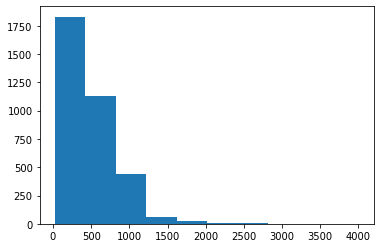

In [79]:
data = []
with open('data/experiment_inputs/ontonotes_english/train.english.512.jsonlines', 'r') as f:
    reader = jsonlines.Reader(f)
    for line in reader:
        data.append(line)
with open('data/experiment_inputs/ontonotes_english/dev.english.512.jsonlines', 'r') as f:
    reader = jsonlines.Reader(f)
    for line in reader:
        data.append(line)
with open('data/experiment_inputs/ontonotes_english/test.english.512.jsonlines', 'r') as f:
    reader = jsonlines.Reader(f)
    for line in reader:
        data.append(line)

length_list = []
for line in data:
    length_list.append(len(line['tokens']))

plt.hist(length_list)
plt.show()

In [80]:
print(sorted(length_list, reverse=True))

[4009, 3278, 3231, 2685, 2621, 2552, 2527, 2410, 2374, 2314, 2222, 2168, 2116, 2057, 2012, 1945, 1925, 1910, 1896, 1886, 1878, 1865, 1861, 1860, 1798, 1759, 1752, 1738, 1723, 1719, 1703, 1682, 1650, 1642, 1640, 1600, 1596, 1594, 1585, 1554, 1549, 1544, 1541, 1540, 1509, 1507, 1500, 1493, 1479, 1468, 1443, 1437, 1437, 1436, 1434, 1432, 1421, 1418, 1417, 1413, 1401, 1392, 1382, 1381, 1379, 1378, 1377, 1369, 1366, 1355, 1353, 1352, 1339, 1324, 1321, 1318, 1309, 1307, 1298, 1296, 1290, 1289, 1285, 1282, 1275, 1275, 1273, 1264, 1259, 1249, 1249, 1248, 1240, 1228, 1222, 1221, 1218, 1216, 1205, 1203, 1198, 1195, 1194, 1191, 1190, 1187, 1182, 1182, 1172, 1164, 1156, 1149, 1146, 1145, 1142, 1138, 1133, 1131, 1131, 1130, 1129, 1126, 1124, 1121, 1121, 1120, 1113, 1110, 1106, 1104, 1104, 1103, 1102, 1093, 1093, 1090, 1089, 1089, 1088, 1087, 1086, 1082, 1080, 1080, 1078, 1078, 1074, 1073, 1072, 1072, 1069, 1068, 1067, 1067, 1066, 1064, 1062, 1061, 1060, 1058, 1058, 1058, 1056, 1055, 1054, 1050, 105

In [78]:
print(data[0].keys())

dict_keys(['doc_key', 'tokens', 'sentences', 'speakers', 'constituents', 'ner', 'clusters', 'sentence_map', 'subtoken_map', 'pronouns'])


In [72]:
length_list = []
for line in data:
    for start, end in flatten_clusters(line['subtoken_map']):
        length_list.append(end-start+1)
print(max(length_list))

plt.hist(length_list)
plt.show()

TypeError: 'int' object is not iterable

In [64]:
print(length_list)

[1, 1, 3, 4, 1, 1, 2, 1, 16, 4, 4, 16, 6, 4, 2, 4, 4, 6, 23, 7, 2, 3, 3, 3, 6, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 1, 3, 3, 3, 6, 3, 2, 2, 5, 2, 5, 5, 2, 4, 4, 5, 2, 8, 4, 5, 5, 1, 2, 2, 1, 1, 12, 5, 3, 2, 2, 2, 5, 19, 8, 4, 5, 5, 3, 3, 7, 3, 10, 3, 3, 5, 9, 5, 2, 2, 5, 2, 5, 3, 3, 10, 20, 15, 8, 4, 4, 3, 13, 9, 4, 33, 3, 18, 22, 5, 5, 1, 11, 7, 6, 6, 4, 5, 5, 5, 5, 6, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 18, 7, 2, 6, 4, 5, 2, 2, 2, 3, 4, 2, 1, 2, 2, 2, 1, 4, 7, 3, 7, 5, 9, 3, 8, 5, 7, 7, 6, 6, 2, 2, 2, 5, 2, 5, 5, 9, 9, 9, 9, 4, 4, 4, 4, 5, 5, 12, 7, 6, 8, 2, 8, 8, 6, 6, 4, 6, 8, 4, 9, 4, 1, 4, 4, 9, 10, 4, 4, 3, 3, 5, 4, 5, 10, 4, 1, 1, 1, 10, 6, 1, 1, 1, 2, 1, 8, 4, 7, 1, 4, 4, 4, 4, 4, 4, 1, 4, 2, 17, 3, 2, 2, 13, 2, 3, 1, 1, 1, 5, 8, 1, 1, 3, 3, 6, 4, 6, 10, 2, 17, 21, 4, 2, 15, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 19, 4, 4, 4, 4, 4, 2, 9, 3, 4, 4, 4, 12, 44, 4, 4, 4, 4, 1, 4, 4, 5, 2, 2, 2, 7, 1, 1, 1, 1, 6, 1, 6, 7, 3, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 17, 4, 13, 6, 1, 3, 4, 1, 2, 6, 

In [66]:
count = 0
for item in length_list:
    if item>15:
        count += 1
print(count/len(length_list))

0.04604629908704656


177


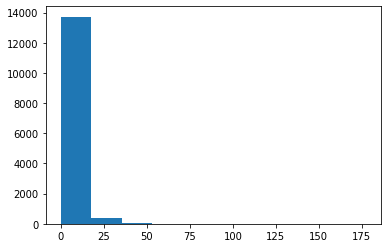

In [60]:
data = []
with open('data/experiment_inputs/ontonotes_chinese/dev.chinese.512.jsonlines', 'r') as f:
    reader = jsonlines.Reader(f)
    for line in reader:
        data.append(line)

length_list = []
for line in data:
    for start, end in flatten_clusters(line['clusters']):
        length_list.append(end-start)
print(max(length_list))

plt.hist(length_list)
plt.show()

In [48]:
print(len(length_list))

44


In [51]:
sample = data[1]
print(len(sample['subtoken_map']))
for item in sample:
    print(item)
    print(sample[item])
    print()

4755
doc_key
nw/ann/00/ann_0020_0

tokens
['نِيُودِلْهِي', 'تَشْتَرِطُ', 'لِ-', '-سَحْبِ', 'الحُشُودِ', 'تَرْجَمَةَ', 'أَقْوالِ', 'مُشَرَّف', 'أَفْعالاً', 'إِسْلام', 'أَباد', 'واصَلَت', 'نِيُودِلْهِي', 'الضَغْطَ', 'عَلَى', 'إِسْلام', 'أَباد', 'لِ-', '-قَمْعِ', 'الجَماعاتِ', 'الإِسْلامِيَّةِ', 'المُتَشَدِّدَةِ', ',', 'فَ-', '-أَعْلَنَ', 'وَزِيرُ', 'الدِفاعِ', 'الهِنْدِيُّ', 'جُورْج', 'فِرْنانْدِيز', 'أَنَّ', 'القُوّاتِ', 'الهِنْدِيَّةَ', 'المُحْتَشِدَةَ', 'عَلَى', 'الحُدُودِ', 'مَعَ', 'باكِسْتانَ', 'لَن', 'تُسْحَبَ', 'إِذا', 'لَم', 'يُتَرْجِمْ', 'الرَئِيسُ', 'الباكِستانِيُّ', 'بَرْوِيز', 'مُشَرَّف', 'تَعَهُّداتِ-', '-هِ', 'لِ-', '-كَبْحِ', 'جِماحِ', 'الإِسْلامِيِّينَ', 'إِلَى', 'أَفْعالٍ', '.', 'وَ-', '-رَدَّت', 'الحُكُومَةُ', 'الباكِستانِيَّةُ', 'بِ-', '-أَنَّ-', '-ها', 'تَنْتَظِرُ', 'سَحْبَ', 'القُوّاتِ', 'الهِنْدِيَّةِ', 'لِ-', '-تَخْفِيفِ', 'حِدَّةِ', 'التَوَتُّرِ', ',', 'ل`كِنَّ-', '-ها', 'مَضَت', 'فِي', '{ِعْتِقالِ', 'مَزِيدٍ', 'مِن', 'المُتَطَرِّفِينَ', '.', 'وَ-', '-صَرَّحَ', 'ف

8253


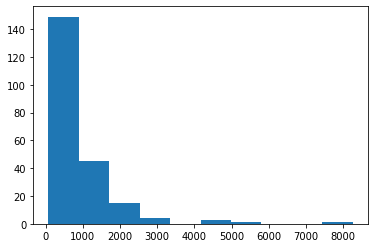

In [34]:
data = []
with open('data/experiment_inputs/ontonotes_chinese/test.chinese.512.jsonlines', 'r') as f:
    reader = jsonlines.Reader(f)
    for line in reader:
        data.append(line)

length_list = []
for line in data:
    length_list.append(len(line['subtoken_map']))
print(max(length_list))

plt.hist(length_list)
plt.show()

In [18]:
sample = data[0]
for item in sample:
    print(item)
    print(sample[item])
    print()

doc_key
bc/cctv/00/cctv_0001_0

tokens
['什么样', '的', '记忆', '？', '敬请', '收看', '走遍', '中国', '特别', '节目', '，', '中国', '大地', '上', '的', '二战', '标志', '之', '太行', '永志', '。', 'ＥＭＰＴＹ', '百团大战', '纪念碑', '巍然', '屹立', '在', '太行山', '上', '，', '它', '由', '主碑', '，', '副碑', '，', '一', '座', '大型', '圆雕', '和', '烽火台', '，', '长城', '等', '组成', '。', '主碑', '和', '三', '座', '副碑', '以及', '两', '座', '题字碑', '。', '百团大战', '是', '八路军', '在', '抗战', '期间', '发动', '的', '规模', '最', '大', '的', '一', '次', '战役', '。', '这', '场', '战役', '打破', '了', '日军', '对', '敌后', '根据地', '的', '封锁', '，', '振奋', '全', '国', '人民', '抗日', '精神', '，', '影响', '了', '世界', '人民', '反法西斯', '战争', '的', '形势', '。', 'ＥＭＰＴＹ', '这里', '是', '山西省', '武乡县', '的', '砖壁村', '，', '当年', '八路军', '的', '总部', '就', '设', '在', '这里', '。', '在', '总部', '外', '的', '墙', '上', '我们', '发现', '了', '一', '张', '地图', '，', '这', '张', '地图', '是', '当年', '八路军', '绘制', '的', '地中海', '形势图', '。', '该', '图', '反映', '的', '是', '欧洲', '战场', '的', '形势', '。', '一九四零年', '，', '德军', '侵占', '捷克', '，', '波兰', '，', '荷兰', '，', '比利时', '和', '法国', '。', '也', '就', '在', 

In [52]:
print(sample['clusters'])

[[[1, 11], [542, 552], [938, 948], [82, 92], [3163, 3173]], [[32, 37], [1785, 1800], [199, 248], [2654, 2696], [727, 732], [406, 421], [2815, 2816]], [[579, 593], [3783, 3795], [4082, 4094], [4575, 4581], [758, 771], [276, 302], [54, 60], [312, 314], [3202, 3208]], [[68, 75], [2491, 2498], [4379, 4386], [104, 111]], [[789, 791], [555, 557], [163, 194], [510, 518]], [[2568, 2574], [3873, 3879], [242, 248], [4252, 4258], [4720, 4726], [2706, 2712], [3580, 3586], [1030, 1036]], [[2024, 2031], [362, 378], [457, 458], [388, 389]], [[3571, 3576], [4517, 4522], [800, 805], [4243, 4248]], [[877, 1029], [935, 937]], [[963, 994], [1048, 1051]], [[851, 1029], [1117, 1130]], [[4711, 4726], [2867, 2883], [1392, 1401], [2271, 2280], [2765, 2774]], [[1586, 1597], [1610, 1613]], [[1890, 1920], [1698, 1700]], [[3143, 3160], [1704, 1721], [3909, 3926]], [[1989, 1996], [1826, 1831]], [[2113, 2115], [2082, 2085], [2072, 2081]], [[2284, 2300], [3520, 3527]], [[2921, 3002], [2953, 2954]], [[3062, 3065], [30

In [57]:
print(sample['sentences'])

[['<s>', '▁ن', 'ِ', 'ي', 'ُ', 'ود', 'ِ', 'ل', 'ْ', 'ه', 'ِ', 'ي', '▁ت', 'َ', 'ش', 'ْ', 'ت', 'َ', 'ر', 'ِ', 'ط', 'ُ', '▁ل', 'ِ', '-', '▁-', 'س', 'َ', 'ح', 'ْ', 'ب', 'ِ', '▁الح', 'ُ', 'ش', 'ُ', 'ود', 'ِ', '▁ت', 'َ', 'ر', 'ْ', 'ج', 'َ', 'م', 'َ', 'ة', 'َ', '▁أ', 'َ', 'ق', 'ْ', 'وال', 'ِ', '▁م', 'ُ', 'ش', 'َ', 'ر', 'َّ', 'ف', '▁أ', 'َ', 'ف', 'ْ', 'عال', 'ا', 'ً', '▁إ', 'ِ', 'س', 'ْ', 'لام', '▁أ', 'َ', 'باد', '▁و', 'اص', 'َ', 'ل', 'َ', 'ت', '▁ن', 'ِ', 'ي', 'ُ', 'ود', 'ِ', 'ل', 'ْ', 'ه', 'ِ', 'ي', '▁الض', 'َ', 'غ', 'ْ', 'ط', 'َ', '▁ع', 'َ', 'ل', 'َ', 'ى', '▁إ', 'ِ', 'س', 'ْ', 'لام', '▁أ', 'َ', 'باد', '▁ل', 'ِ', '-', '▁-', 'ق', 'َ', 'م', 'ْ', 'ع', 'ِ', '▁الج', 'َ', 'م', 'اعات', 'ِ', '▁الإ', 'ِ', 'س', 'ْ', 'لام', 'ِ', 'ي', 'َّ', 'ة', 'ِ', '▁الم', 'ُ', 'ت', 'َ', 'ش', 'َ', 'د', 'ِّ', 'د', 'َ', 'ة', 'ِ', '▁', ',', '▁ف', 'َ', '-', '▁-', 'أ', 'َ', 'ع', 'ْ', 'ل', 'َ', 'ن', 'َ', '▁و', 'َ', 'ز', 'ِ', 'ير', 'ُ', '▁الد', 'ِ', 'فاع', 'ِ', '▁اله', 'ِ', 'ن', 'ْ', 'د', 'ِ', 'ي', 'ُّ', '▁ج', 'ُ', 'ور', 'ْ', 

In [56]:
for item in flatten_clusters(sample['clusters']):
    start, end = item
    print(item, end-start)

[1, 11] 10
[542, 552] 10
[938, 948] 10
[82, 92] 10
[3163, 3173] 10
[32, 37] 5
[1785, 1800] 15
[199, 248] 49
[2654, 2696] 42
[727, 732] 5
[406, 421] 15
[2815, 2816] 1
[579, 593] 14
[3783, 3795] 12
[4082, 4094] 12
[4575, 4581] 6
[758, 771] 13
[276, 302] 26
[54, 60] 6
[312, 314] 2
[3202, 3208] 6
[68, 75] 7
[2491, 2498] 7
[4379, 4386] 7
[104, 111] 7
[789, 791] 2
[555, 557] 2
[163, 194] 31
[510, 518] 8
[2568, 2574] 6
[3873, 3879] 6
[242, 248] 6
[4252, 4258] 6
[4720, 4726] 6
[2706, 2712] 6
[3580, 3586] 6
[1030, 1036] 6
[2024, 2031] 7
[362, 378] 16
[457, 458] 1
[388, 389] 1
[3571, 3576] 5
[4517, 4522] 5
[800, 805] 5
[4243, 4248] 5
[877, 1029] 152
[935, 937] 2
[963, 994] 31
[1048, 1051] 3
[851, 1029] 178
[1117, 1130] 13
[4711, 4726] 15
[2867, 2883] 16
[1392, 1401] 9
[2271, 2280] 9
[2765, 2774] 9
[1586, 1597] 11
[1610, 1613] 3
[1890, 1920] 30
[1698, 1700] 2
[3143, 3160] 17
[1704, 1721] 17
[3909, 3926] 17
[1989, 1996] 7
[1826, 1831] 5
[2113, 2115] 2
[2082, 2085] 3
[2072, 2081] 9
[2284, 2300] 16


In [21]:
print(len(sample['subtoken_map']), len(sample['tokens']))

1720 781


In [3]:
import jsonlines

new_data = []
with open('data/experiment_inputs/dialogue_corrected_1_chinese/test.chinese.512.jsonlines', 'r') as f:
    reader = jsonlines.jsonlines.Reader(f)
    for item in reader:
        new_data.append(item)

data = []
with open('data/downloaded/dialogue_chinese/test.chinese.512.jsonlines', 'r') as f:
    reader = jsonlines.jsonlines.Reader(f)
    for item in reader:
        data.append(item)

In [4]:
print(len(new_data), len(data))

133 133


In [8]:
for i in range(len(new_data)):
    print(new_data[i]['tokens'])
    print(sorted(new_data[i]['clusters']))
    print()
    print(data[i]['tokens'])
    print(sorted(data[i]['clusters']))
    print("=="*50)

['就', '这', '样', '啦', '耳', '洞', '打', '好', '了', '!', '感', '觉', '挺', '不', '错', '的', '好', '漂', '亮', '天', '啊', '要', '是', '我', '妈', '妈', '看', '到', '我', '她', '要', '把', '我', '锁', '进', '罪', '孽', '柜', '里', '面', '壁', '思', '过', '了', '你', '在', '开', '玩', '笑', '吧', '?', '说', '实', '话', '她', '才', '是', '玩', '笑', '我', '还', '能', '从', '柜', '子', '缝', '里', '看', '电', '视', '呢', '我', '终', '于', '明', '白', '为', '什', '么', '你', '和', '你', '妈', '妈', '的', '关', '系', '不', '亲', '密', '了', '但', '是', '她', '要', '是', '结', '婚', '了', '她', '还', '是', '会', '告', '诉', '妈', '妈', '的', '你', '抓', '着', '这', '事', '不', '放', '手', '了', '吗', '?', '他', '们', '不', '知', '道', '这', '事', '让', '人', '很', '伤', '心', '我', '是', '说', '他', '们', '都', '爱', 'L', 'e', 'o', 'n', 'a', 'r', 'd', '好', '吧', '你', '们', '要', '我', '打', '电', '话', '吗', '?', '我', '打', '电', '话', '为', '什', '么', '我', '会', '这', '么', '紧', '张', '?', '这', '可', '以', '理', '解', 'A', 'm', 'y', '告', '诉', '妈', '妈', '她', '和', 'S', 'h', 'e', 'l', 'd', 'o', 'n', '分', '手', '的', '时', '候', '也', '很', '害', '怕',

In [9]:
955+134+133

1222

In [10]:
1086+270

1356